In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [8]:
from sklearn.datasets import load_boston

In [9]:
boston = load_boston()

In [10]:
print (boston.DESCR)
#don't forget to put the parenthesis

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

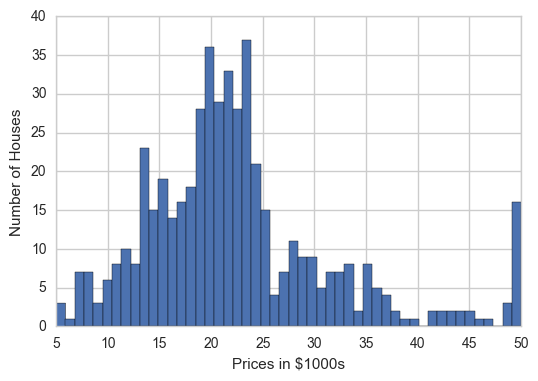

In [11]:
plt.hist(boston.target,bins=50)
# the 'target' method

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of Houses')

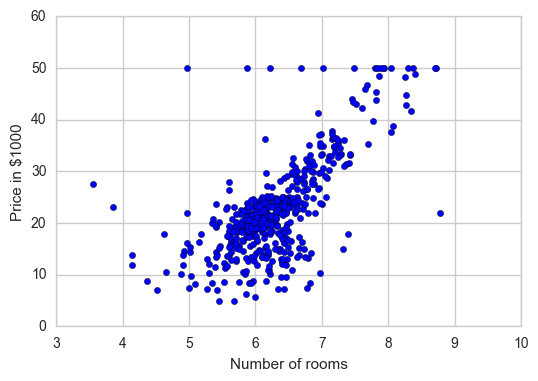

In [12]:
plt.scatter(boston.data[:,5],boston.target)
#the target method may not work on other datasets. cleaning maybe involved.  

plt.ylabel('Price in $1000')

plt.xlabel('Number of rooms')

In [13]:
boston_df = DataFrame(boston.data)
#creating a dataframe called boston_df

boston_df.columns = boston.feature_names

boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
boston_df['Price'] = boston.target
#created the column 'Price'

In [15]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


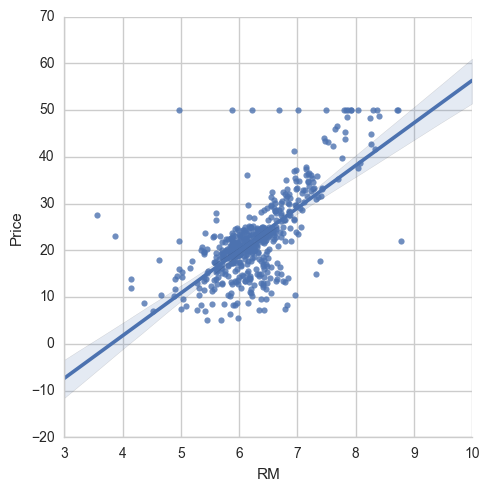

In [16]:
sns.lmplot('RM','Price',data=boston_df)

Least Square line. 

In [17]:
import webbrowser

In [18]:
url = 'https://www.youtube.com/watch?v=Qa2APhWjQPc'
#this video is a great explanation to the math behind least square line. 

In [36]:
webbrowser.open(url)

True

In [19]:
x = boston_df.RM
x.shape

(506,)

In [20]:
x
#case sensitive

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, dtype: float64

In [21]:
x = np.vstack(boston_df.RM)
#This method adds an attribute to the shape?

In [22]:
x.shape

(506, 1)

In [23]:
y = boston_df.Price

In [24]:
# [x 1]
x = np.array( [ [value,1] for value in x]  )

#for every value in x, set the value as (X , 1).
#And make an array of the value, 1 from the loop. 

In [25]:
x

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [26]:
m , b = np.linalg.lstsq(x,y)[0]

#Now get out m and b values for our best fit line. 

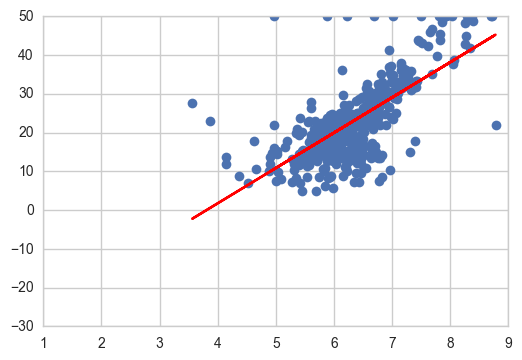

In [29]:
plt.plot(boston_df.RM,boston_df.Price,'o')

#x = boston_df.RM
x = np.array([[value,1] for value in x])

plt.plot(x, m*x + b, 'r', label = 'Best Fits Line')

In [30]:
result = np.linalg.lstsq(x,y)

error_total = result[1]

rmse = np.sqrt(error_total/len(x))

print ('The root mean square error was %.2f' %rmse)

The root mean square error was 6.60


In [31]:
import sklearn
from sklearn.linear_model import LinearRegression 

In [32]:
lreg = LinearRegression()

In [33]:
x_multi = boston_df.drop('Price',1)

y_target = boston_df.Price

In [34]:
lreg.fit(x_multi,y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print('The estimate intercept coefficient is %.2f' %lreg.intercept_)

print('The number of coefficients used was %d' %len(lreg.coef_))

The estimate intercept coefficient is 36.49
The number of coefficients used was 13
